In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import glob

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

import plotly.express as px

# Importing data

In [2]:
sorted(glob.glob(r'../input/sp500-stock-prices/*csv'))


['../input/sp500-stock-prices/A.csv',
 '../input/sp500-stock-prices/AAL.csv',
 '../input/sp500-stock-prices/AAP.csv',
 '../input/sp500-stock-prices/AAPL.csv',
 '../input/sp500-stock-prices/ABBV.csv',
 '../input/sp500-stock-prices/ABC.csv',
 '../input/sp500-stock-prices/ABMD.csv',
 '../input/sp500-stock-prices/ABT.csv',
 '../input/sp500-stock-prices/ACN.csv',
 '../input/sp500-stock-prices/ADBE.csv',
 '../input/sp500-stock-prices/ADI.csv',
 '../input/sp500-stock-prices/ADM.csv',
 '../input/sp500-stock-prices/ADP.csv',
 '../input/sp500-stock-prices/ADSK.csv',
 '../input/sp500-stock-prices/AEE.csv',
 '../input/sp500-stock-prices/AEP.csv',
 '../input/sp500-stock-prices/AES.csv',
 '../input/sp500-stock-prices/AFL.csv',
 '../input/sp500-stock-prices/AIG.csv',
 '../input/sp500-stock-prices/AIZ.csv',
 '../input/sp500-stock-prices/AJG.csv',
 '../input/sp500-stock-prices/AKAM.csv',
 '../input/sp500-stock-prices/ALB.csv',
 '../input/sp500-stock-prices/ALGN.csv',
 '../input/sp500-stock-prices/ALK.c

In [3]:
# There are 503 S&P companies stock prices
len(glob.glob(r'../input/sp500-stock-prices/*csv'))

503

In [4]:
apple = pd.read_csv(r'../input/sp500-stock-prices/AAPL.csv')
amazon = pd.read_csv(r'../input/sp500-stock-prices/AMZN.csv')
google =pd.read_csv(r'../input/sp500-stock-prices/GOOG.csv')
meta =pd.read_csv(r'../input/sp500-stock-prices/META.csv')
microsoft = pd.read_csv(r'../input/sp500-stock-prices/MSFT.csv')

In [5]:
apple['Name'] = 'AAPL'
amazon['Name'] = 'AMZN'
google['Name'] = 'GOOG'
meta['Name'] = 'META'
microsoft['Name'] = 'MSFT'

In [6]:
data1 = apple._append(amazon, ignore_index = True)
data2= data1._append(google, ignore_index = True)
data3 = data2._append(meta, ignore_index = True)
all_data = data3._append(microsoft, ignore_index = True)

all_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0,AAPL
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0,AAPL
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0,AAPL
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0,AAPL
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
33024,2022-07-06,263.750000,267.989990,262.399994,266.209991,23824400,0.0,0.0,MSFT
33025,2022-07-07,265.119995,269.059998,265.019989,268.399994,20859900,0.0,0.0,MSFT
33026,2022-07-08,264.790009,268.100006,263.290009,267.660004,19648100,0.0,0.0,MSFT
33027,2022-07-11,265.649994,266.529999,262.179993,264.510010,19455200,0.0,0.0,MSFT


# Analysing change in price of stock overtime

checking for missing values and duplicates and fixing errors

In [7]:
all_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33024    False
33025    False
33026    False
33027    False
33028    False
Length: 33029, dtype: bool

In [8]:
all_data[all_data.duplicated()].shape # No duplicates


(0, 9)

In [9]:
all_data.isnull().sum() # No missing values

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Name            0
dtype: int64

In [10]:
all_data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Name             object
dtype: object

In [11]:
# changing date datatype from object to datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Name                    object
dtype: object

In [12]:
tech_list =all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype=object)

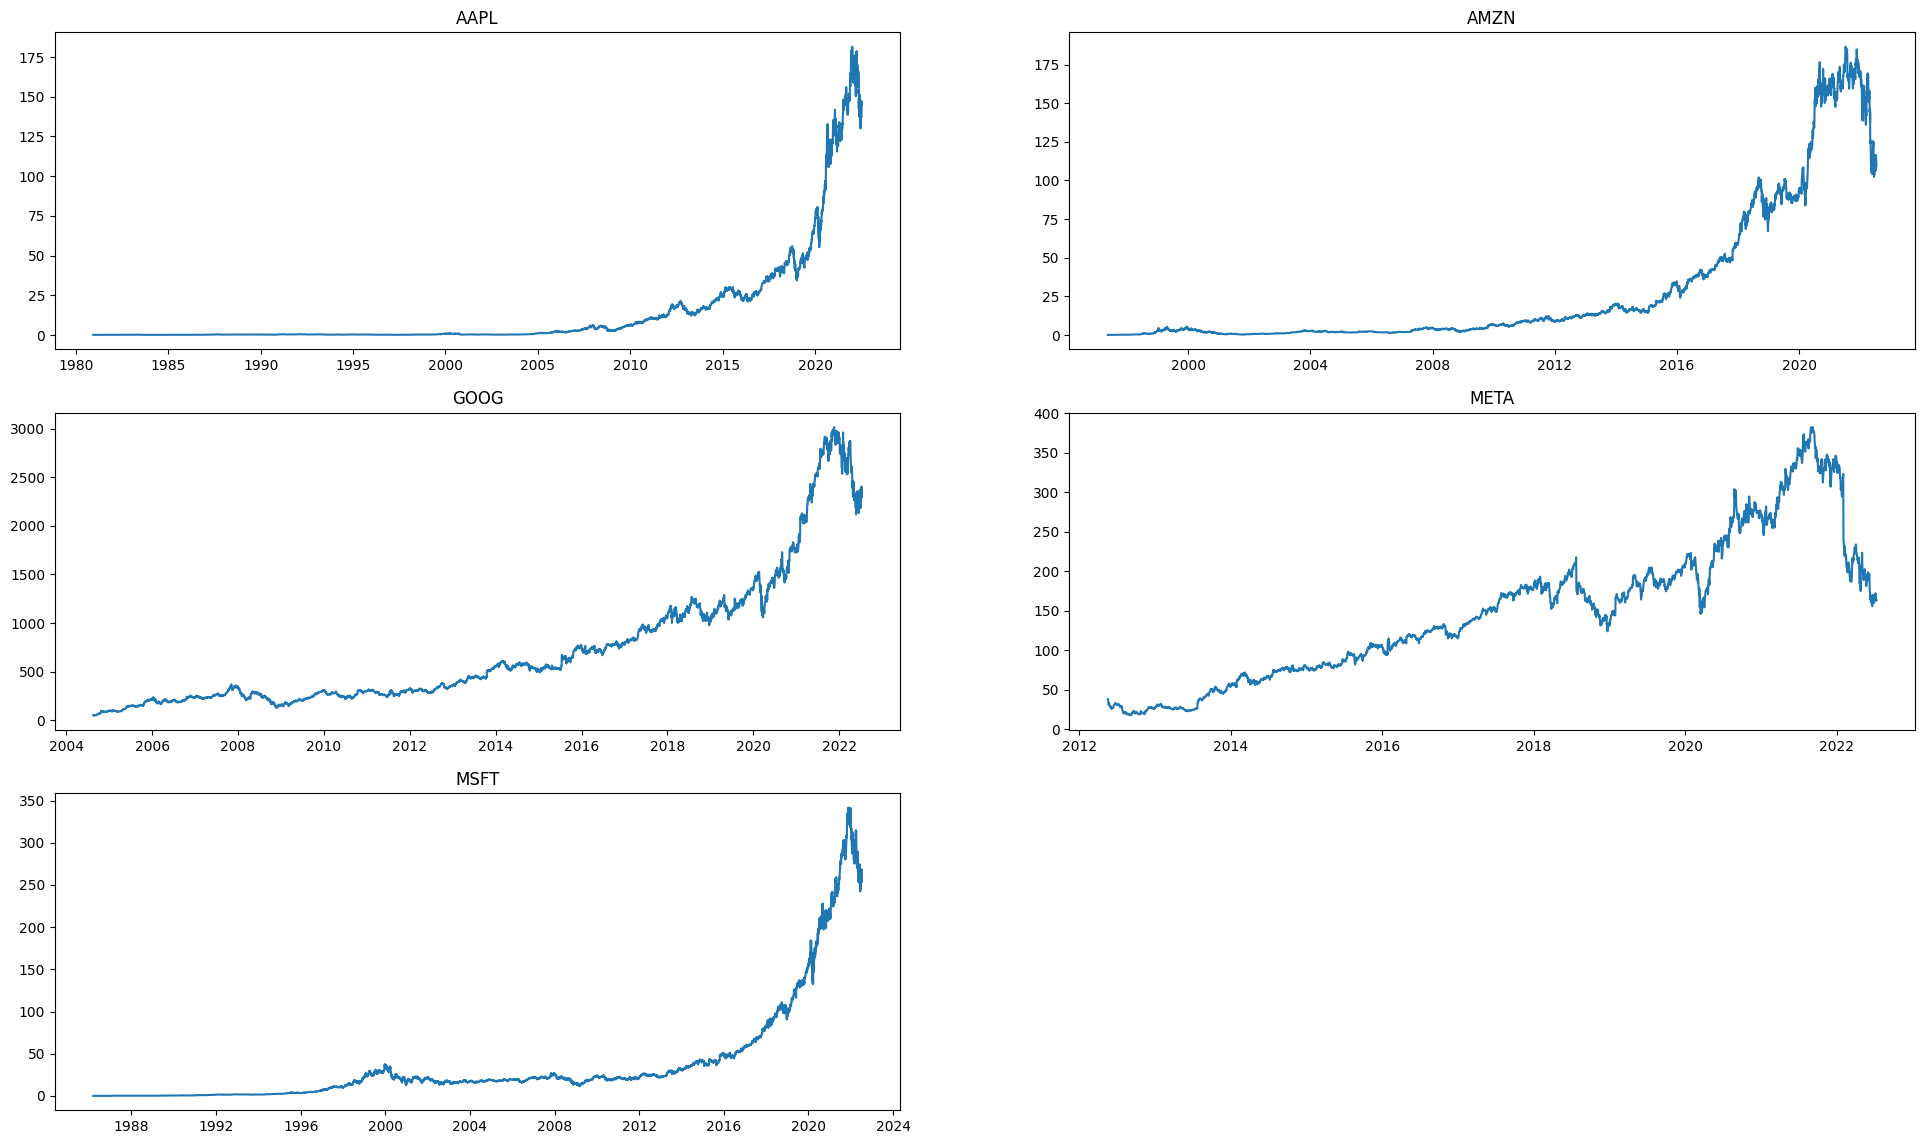

In [13]:
plt.figure(figsize=(24,14))
for index, company in enumerate(tech_list, 1):
    plt.subplot(3, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['Date'] , df['Close'])
    plt.title(company)
    

# Moving Average Analysis

In [14]:
all_data['Close'].rolling(window = 10).mean().head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.101224
10    0.103750
11    0.106494
12    0.109587
13    0.112592
14    0.115075
Name: Close, dtype: float64

In [15]:
new_data = all_data.copy()

ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['Close_'+ str(ma)]=new_data['Close'].rolling(ma).mean()
    
new_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Close_10,Close_20,Close_50
33024,2022-07-06,263.750000,267.989990,262.399994,266.209991,23824400,0.0,0.0,MSFT,260.679001,257.617501,264.598742
33025,2022-07-07,265.119995,269.059998,265.019989,268.399994,20859900,0.0,0.0,MSFT,262.206000,257.412501,264.365388
33026,2022-07-08,264.790009,268.100006,263.290009,267.660004,19648100,0.0,0.0,MSFT,263.086002,257.275001,264.326747
33027,2022-07-11,265.649994,266.529999,262.179993,264.510010,19455200,0.0,0.0,MSFT,262.767001,257.261001,263.965709
33028,2022-07-12,265.880005,265.940002,252.039993,253.669998,35843000,0.0,0.0,MSFT,261.645000,257.295000,263.259969


In [16]:
new_data.set_index('Date' , inplace = True)


In [17]:
new_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Name', 'Close_10', 'Close_20', 'Close_50'],
      dtype='object')

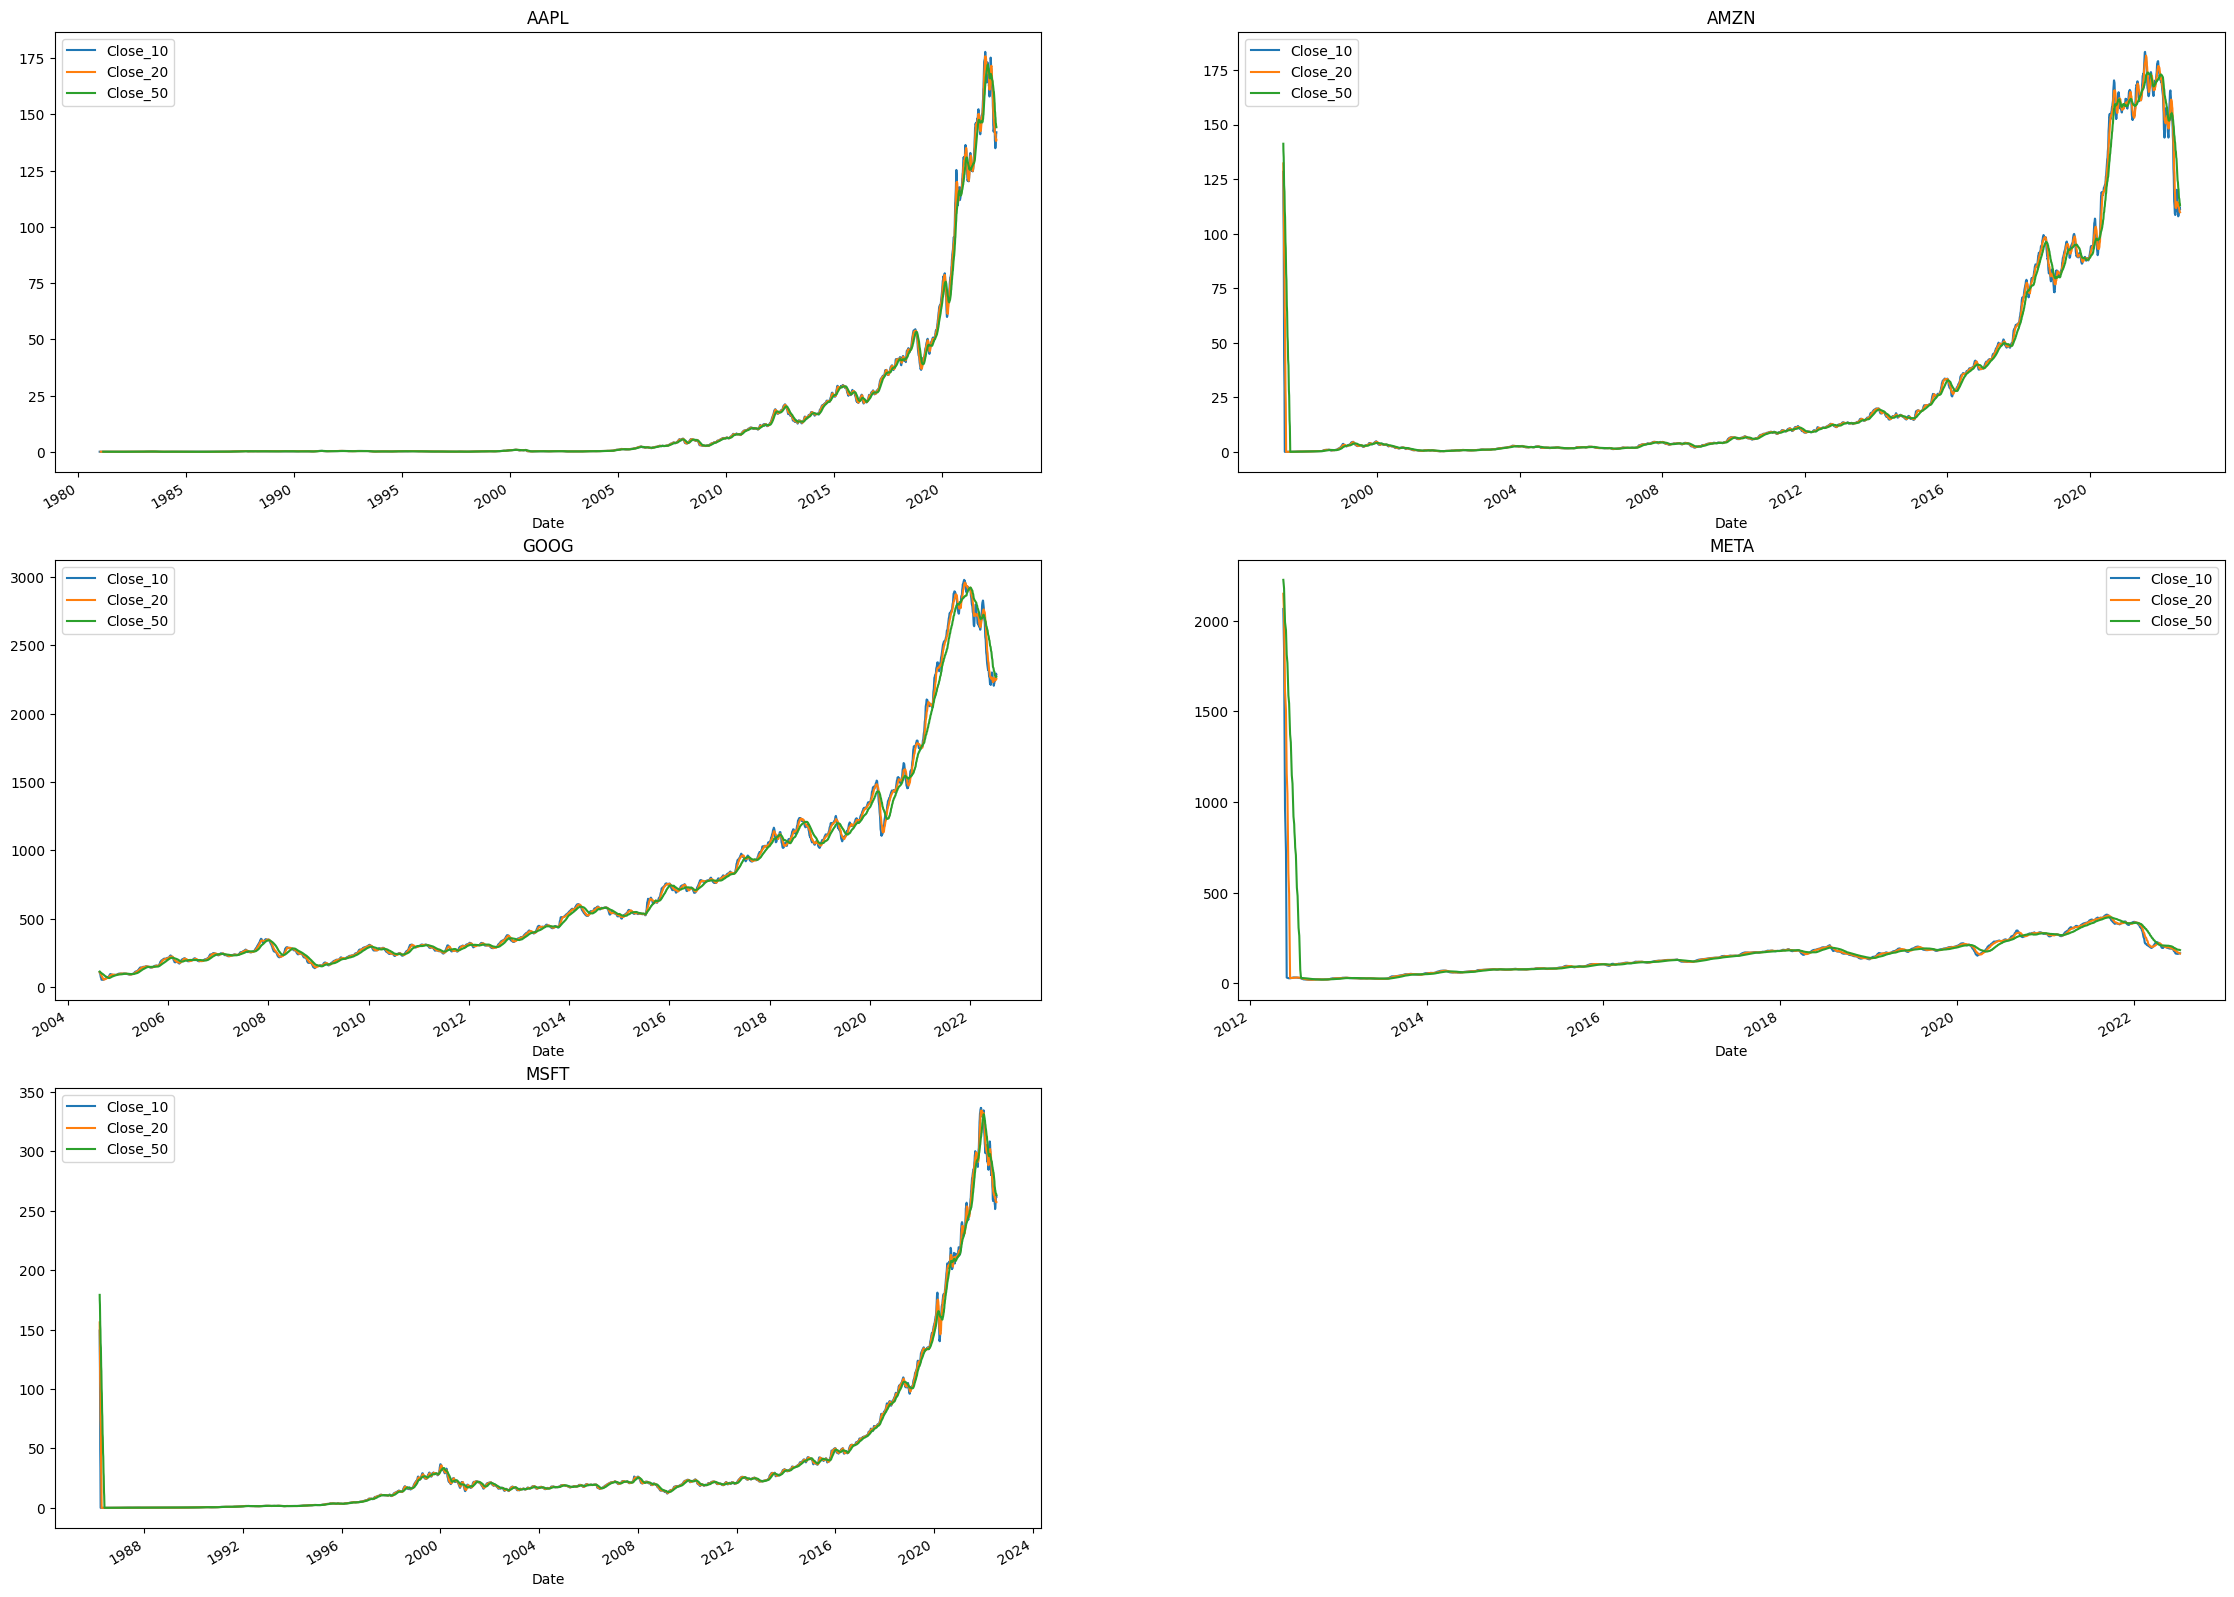

In [18]:
plt.figure(figsize=(28,22))
for index, company in enumerate(tech_list, 1):
    plt.subplot(3, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['Close_10',
       'Close_20', 'Close_50']].plot(ax=plt.gca())
    plt.title(company)

# Multi-Variate analysis to understand corelation

In [19]:
closing_price = pd.DataFrame()

In [20]:
closing_price['apple_close']= apple['Close']
closing_price['amazon_close']= amazon['Close']
closing_price['google_close']= google['Close']
closing_price['meta_close']= meta['Close']
closing_price['microsoft_close']= microsoft['Close']

closing_price

,apple_close,amazon_close,google_close,meta_close,microsoft_close
0,0.100178,0.097917,49.982655,38.230000,0.061109
1,0.094952,0.086458,53.952770,34.029999,0.063292
2,0.087983,0.085417,54.495735,31.000000,0.064383
3,0.090160,0.081771,52.239197,32.000000,0.062746
4,0.092774,0.071354,52.802086,33.029999,0.061655
...,...,...,...,...,...
10478,142.919998,NaN,NaN,NaN,NaN
10479,146.350006,NaN,NaN,NaN,NaN
10480,147.039993,NaN,NaN,NaN,NaN
10481,144.869995,NaN,NaN,NaN,NaN


<Figure size 2800x2200 with 0 Axes>

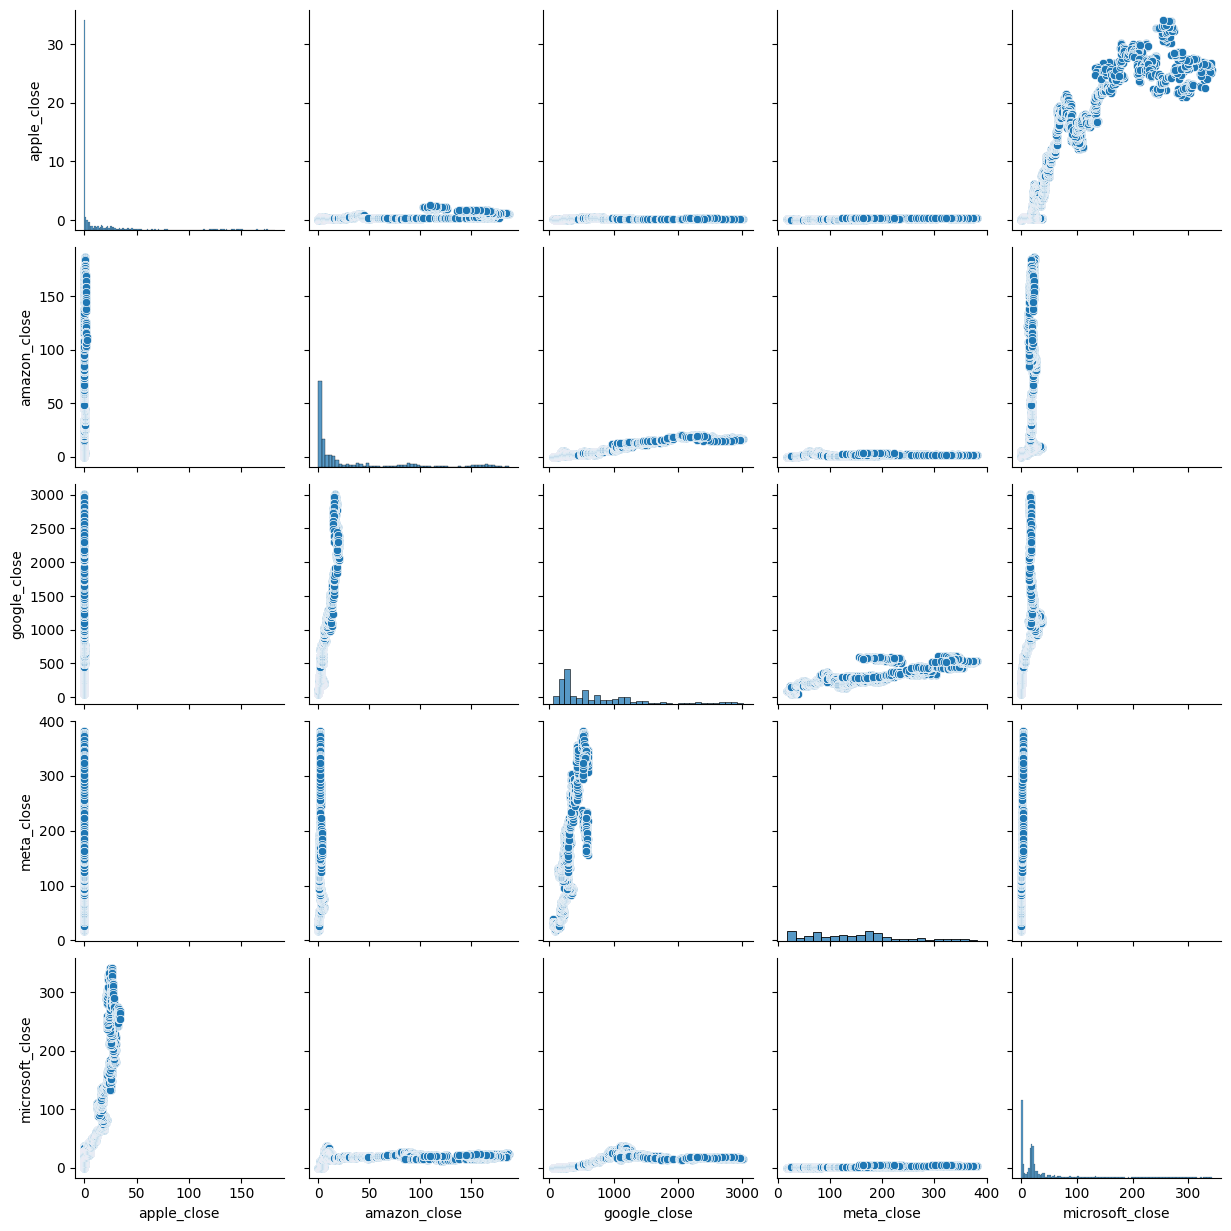

In [21]:
plt.figure(figsize=(28,22))
sns.pairplot(closing_price)



In [22]:
closing_price.corr()

,apple_close,amazon_close,google_close,meta_close,microsoft_close
apple_close,1.000000,0.609642,0.139395,0.739913,0.921681
amazon_close,0.609642,1.000000,0.940306,0.158117,0.521548
google_close,0.139395,0.940306,1.000000,0.818416,0.712927
meta_close,0.739913,0.158117,0.818416,1.000000,0.873613
microsoft_close,0.921681,0.521548,0.712927,0.873613,1.000000


<Axes: >

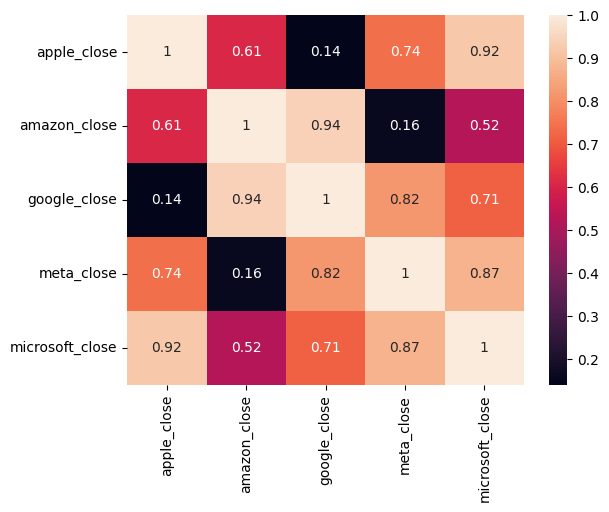

In [23]:
sns.heatmap(closing_price.corr() , annot= True)

# Performing co-relation analysis

In [24]:
closing_price

,apple_close,amazon_close,google_close,meta_close,microsoft_close
0,0.100178,0.097917,49.982655,38.230000,0.061109
1,0.094952,0.086458,53.952770,34.029999,0.063292
2,0.087983,0.085417,54.495735,31.000000,0.064383
3,0.090160,0.081771,52.239197,32.000000,0.062746
4,0.092774,0.071354,52.802086,33.029999,0.061655
...,...,...,...,...,...
10478,142.919998,NaN,NaN,NaN,NaN
10479,146.350006,NaN,NaN,NaN,NaN
10480,147.039993,NaN,NaN,NaN,NaN
10481,144.869995,NaN,NaN,NaN,NaN


In [25]:
closing_price['apple_close']

0          0.100178
1          0.094952
2          0.087983
3          0.090160
4          0.092774
            ...    
10478    142.919998
10479    146.350006
10480    147.039993
10481    144.869995
10482    145.860001
Name: apple_close, Length: 10483, dtype: float64

In [26]:
closing_price['apple_close'].shift(1)

0               NaN
1          0.100178
2          0.094952
3          0.087983
4          0.090160
            ...    
10478    141.559998
10479    142.919998
10480    146.350006
10481    147.039993
10482    144.869995
Name: apple_close, Length: 10483, dtype: float64

In [27]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0             NaN
1       -5.217078
2       -7.339796
3        2.475110
4        2.899225
           ...   
10478    0.960724
10479    2.399950
10480    0.471464
10481   -1.475788
10482    0.683375
Name: apple_close, Length: 10483, dtype: float64

In [28]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'meta_close',
       'microsoft_close'],
      dtype='object')

In [29]:
for col in closing_price.columns:
    closing_price[col + '_pct_change']=(closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100
    
    

In [30]:
closing_price.head()

,apple_close,amazon_close,google_close,meta_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,meta_close_pct_change,microsoft_close_pct_change
0,0.100178,0.097917,49.982655,38.230000,0.061109,NaN,NaN,NaN,NaN,NaN
1,0.094952,0.086458,53.952770,34.029999,0.063292,-5.217078,-11.702769,7.942987,-10.986139,3.571245
2,0.087983,0.085417,54.495735,31.000000,0.064383,-7.339796,-1.204047,1.006371,-8.903905,1.724994
3,0.090160,0.081771,52.239197,32.000000,0.062746,2.475110,-4.268472,-4.140761,3.225806,-2.543197
4,0.092774,0.071354,52.802086,33.029999,0.061655,2.899225,-12.739234,1.077523,3.218746,-1.738955


In [31]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'meta_close',
       'microsoft_close', 'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'meta_close_pct_change',
       'microsoft_close_pct_change'],
      dtype='object')

In [32]:
closing_p = closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'meta_close_pct_change', 'microsoft_close_pct_change']]

In [33]:
closing_p.head()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,meta_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN,NaN
1,-5.217078,-11.702769,7.942987,-10.986139,3.571245
2,-7.339796,-1.204047,1.006371,-8.903905,1.724994
3,2.475110,-4.268472,-4.140761,3.225806,-2.543197
4,2.899225,-12.739234,1.077523,3.218746,-1.738955


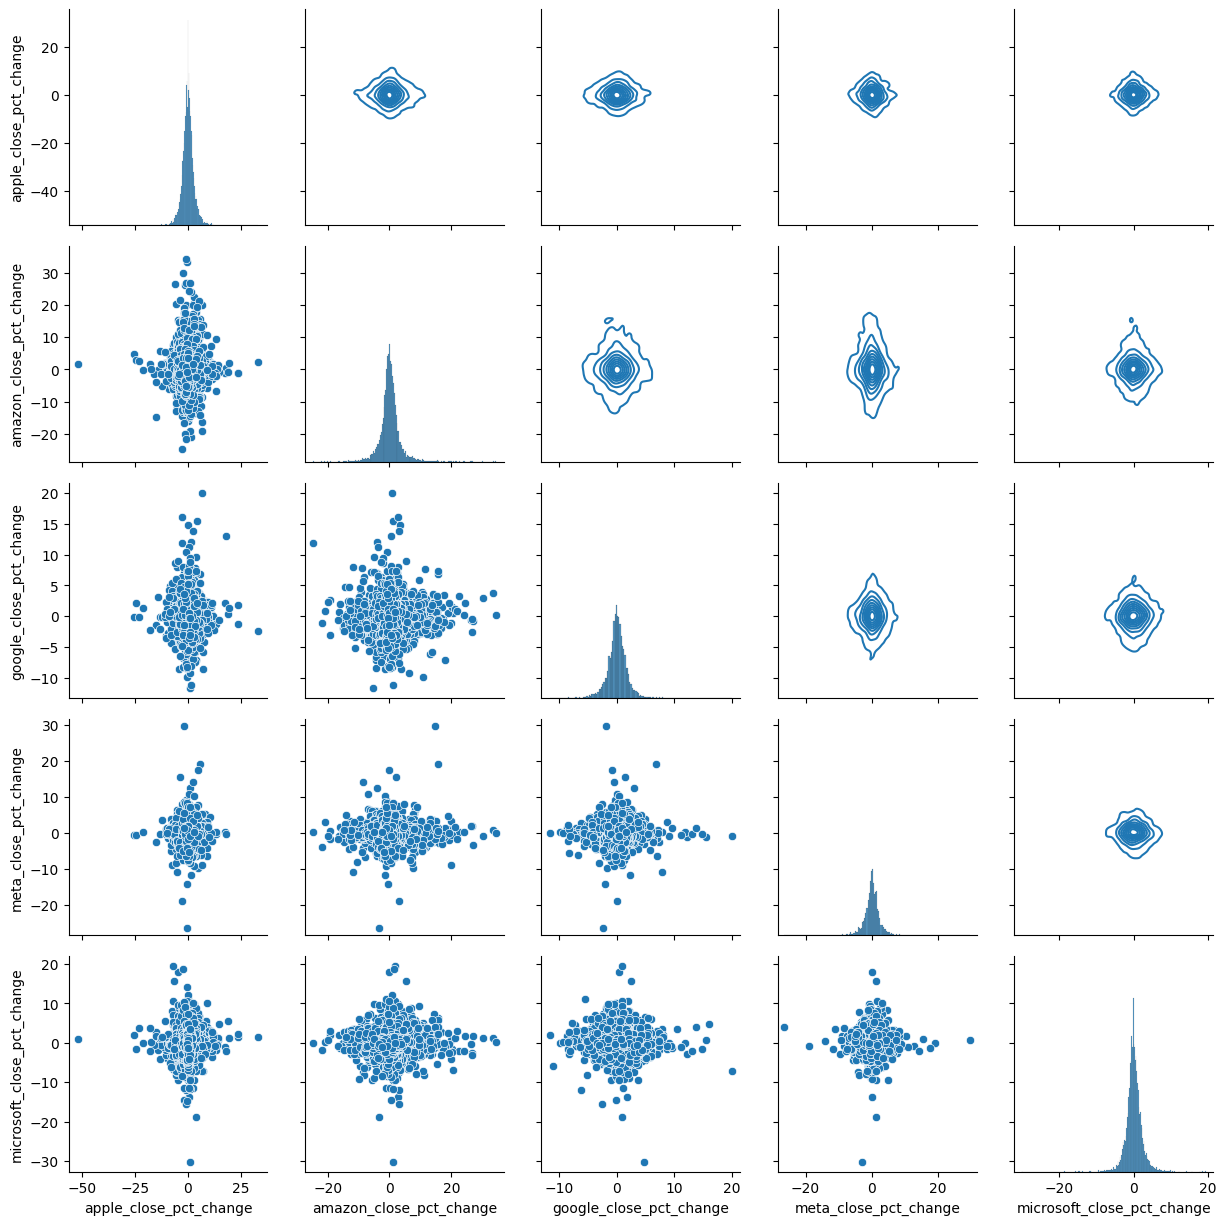

In [34]:
grid=sns.PairGrid(data = closing_p)
grid.map_diag(sns.histplot)
grid.map_lower(sns.scatterplot)
grid.map_upper(sns.kdeplot)

In [35]:
closing_p.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,meta_close_pct_change,microsoft_close_pct_change
apple_close_pct_change,1.000000,0.010366,0.001954,-0.009219,-0.002363
amazon_close_pct_change,0.010366,1.000000,-0.010209,-0.005267,0.004175
google_close_pct_change,0.001954,-0.010209,1.000000,0.005959,-0.016038
meta_close_pct_change,-0.009219,-0.005267,0.005959,1.000000,0.000642
microsoft_close_pct_change,-0.002363,0.004175,-0.016038,0.000642,1.000000


<Axes: >

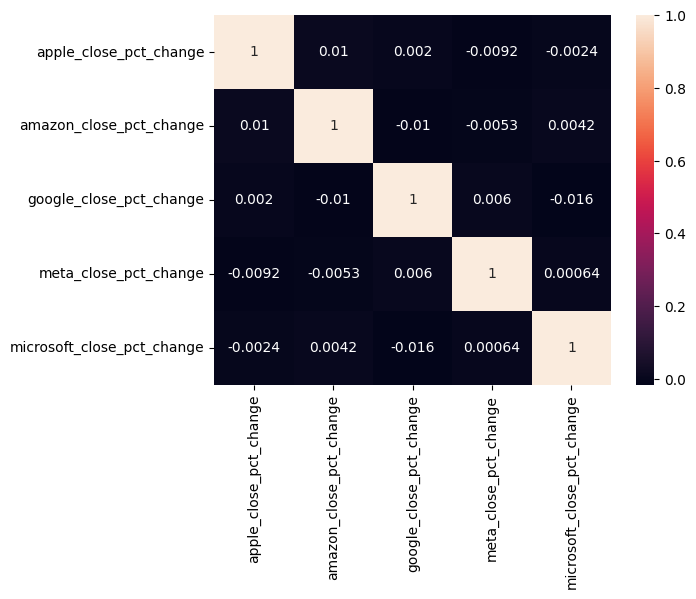

In [36]:
sns.heatmap(closing_p.corr() , annot= True)